In [14]:
!pip install seaborn matplotlib


In [46]:
import numpy as np
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [16]:
#load data
data = pd.read_csv("train.csv")
#print 3 first and 3 last rows
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [17]:
#calculate some statistical data like mean
print(data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [18]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [19]:
#check for missing value
missing_values= data.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [35]:
print(data['Embarked'].unique())

['S' 'C' 'Q']


In [23]:
#replace missing data with mean example: data.fillna(data.mean(), inplace=True)

#for missing age replace with mean
data['Age'].fillna(data['Age'].mean(), inplace=True)
#replace misiing values for objects with mode
data['Cabin'].fillna(data['Cabin'].mode()[0], inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace =True)


print(data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


C:\Users\loisa\AppData\Local\Temp\ipykernel_11324\3556834008.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)


Data used for Heatmap:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB
None

 Number of deaths and surbivals:

Survived
0    549
1    342
Name: count, dtype: int64


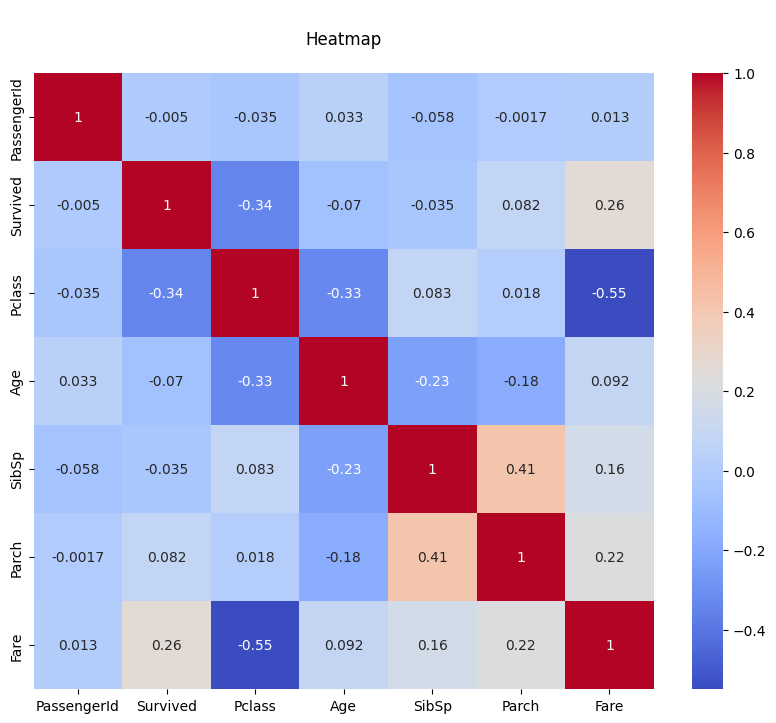

In [64]:
# Creata Heatmap. a) filter to only include cumeric columns
numeric_data = data.select_dtypes(include=['number'])
print("Data used for Heatmap:\n")
print(numeric_data.info())

print("\n Number of deaths and surbivals:\n")
print(numeric_data['Survived'].value_counts())

#calculate correlation matrix
corr_matrix = numeric_data.corr()

#create map
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('\nHeatmap\n')
plt.show()
            

In [45]:
# no missing value. MultiIndexing, pivot tables, and time series analysis.

#a) multi-indexing: I will Used survived, Pclass and 
print("\nMultiIndex DataFrame:\n")
multi_indx_data = data.set_index(['Survived', 'Pclass'])
print(multi_indx_data.head(4))


MultiIndex DataFrame:

                 PassengerId  \
Survived Pclass                
0        3                 1   
1        1                 2   
         3                 3   
         1                 4   

                                                              Name     Sex  \
Survived Pclass                                                              
0        3                                 Braund, Mr. Owen Harris    male   
1        1       Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
         3                                  Heikkinen, Miss. Laina  female   
         1            Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   

                  Age  SibSp  Parch            Ticket     Fare    Cabin  \
Survived Pclass                                                           
0        3       22.0      1      0         A/5 21171   7.2500  B96 B98   
1        1       38.0      1      0          PC 17599  71.2833      C85   
         3    

In [ ]:
#Need to do pivot tables and time seires analysis

In [ ]:
# BUILD THE MODEL

In [49]:
#Selecting features: dependent variable(target variable) and independent variable(feature variables)

x = numeric_data.drop('Survived', axis=1) #independent variables
y = data['Survived'] #dependent variables

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=16) #splitting data

In [61]:
#Model developmemnt and prediction

#a) create a logistic regression classifier
logreg = LogisticRegression(max_iter= 10000,random_state=16)
#b) fit model with data
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test) #predic
#print(y_pred)

[0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0]


In [56]:
#Model evaluation and confusion matrix

'''
A confusion matrix is a table that is used to evaluate the performance of a classification model. 
You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is 
the number of correct and incorrect predictions summed up class-wise.
'''

#import metrics class
from sklearn import metrics

In [62]:
#Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions.
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[121  16]
 [ 54  32]]


Text(0.5, 58.7222222222222, 'Predicted label')

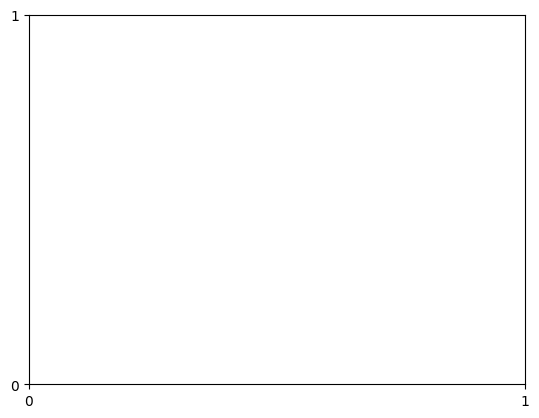

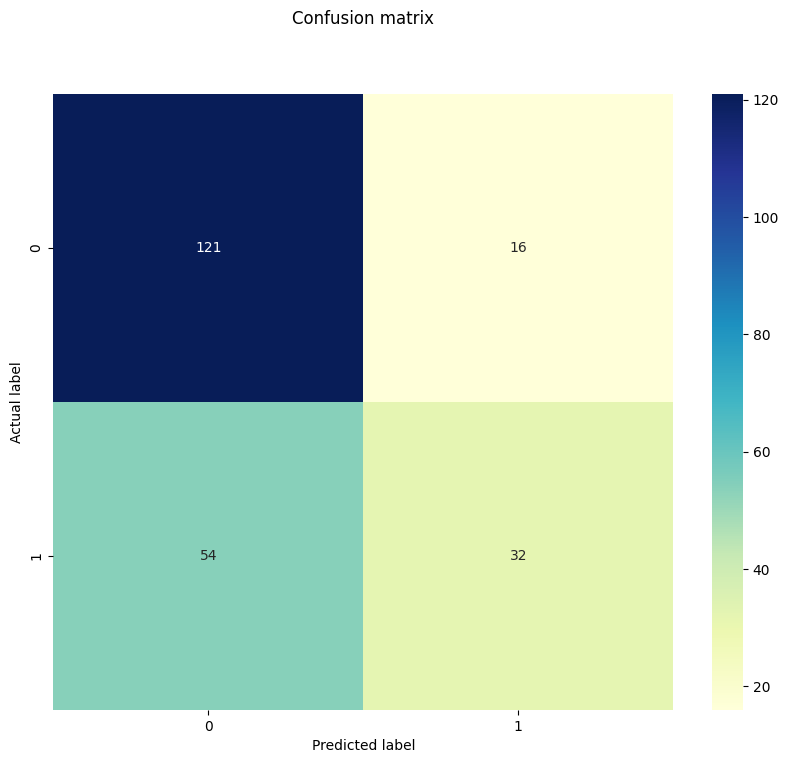

In [63]:
#visualize confusion matrix

class_names = [0,1] #name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap

plt.figure(figsize=(10,8))
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [69]:
#Confusion matrix evaluation metrics
'''
Let's evaluate the model using classification_report 
for accuracy, precision, and recall.
'''
'''
from sklearn.metrics import classification_report
target_names = ['Did not Survided', 'survived']
print(classification_report(y_test, y_pred, target_names=target_names))
'''

"\nfrom sklearn.metrics import classification_report\ntarget_names = ['Did not Survided', 'survived']\nprint(classification_report(y_test, y_pred, target_names=target_names))\n"

In [70]:
#evaluate accuracy of model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.69
